# Exploratory Data Analysis
## Motivation
#### Approximately 1.35 million people die each year as a result of road traffic crashes. How can we reduce the number that pepole died from traffic accidents? The thoughts of this project is to get insights from the accidents data and find some pattern in the dataset.
#### We will focus on the fatal and nonfatal comparison to check if there is any insights between this two conditions and may offer some help about decreasing the fatal accidents happening. 

## Outline:
1. Data understanding
2. Data preprocessing
3. Exploratory Data analysis
4. Final Thoughts

The 1.2 steps has already been down in the previous notebook "Traffic_accident_data_loading_preprocessing", we will focus on the 3 and 4 step in this notebook.

<br>
<br>
Name: CHI HUNG HSIAO
<br>
Email: beggyaaas@gmail.com

### Load data from pickle
<br>
There are 3 dataframe to load:
- accident_data.pkl
- vehicle_data.pkl
- casualties_data.pkl

#### After loading, I will show the analysis from the dataframes. There are several issue I want know and display by chart : 
**First, I will start from "When" and "Where", and go deeper into some combination of conditions to see the result of visualiztion**
1. Which time in a week does the accident usually happen? Is there any pattern?
2. Is the pattern changes with fatal and nonfatal accidents?
3. In the past four years, is there any increasing or decreasing in the number of accidents?
4. How about the trend in the month scale? Is there any different if we seperate the fatal and nonfatal?
5. Where does the fatal accidents happens more? 
6. Which districts has the higher fatal ratio per accidents?
7. Which area happens more , urban or rural?
8. How about the fatal and nonfatal condition?
9. How about the condition of fatal accidents in rural area?
10. In the fatal accidents, is there any difference about the combination of the urban and rural areas? 
11. The age distribution of the fatal casualtie's age

>Note: all graphs in this analysis are made with matplotlib.pyplot and use the style of seaborn-deep

In [448]:
import csv
import numpy as np
import pandas as pd
from time import time
import math
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap

In [449]:
acc_df = pd.read_pickle("./accident_data.pkl")
veh_df = pd.read_pickle("./vehicle_data.pkl")
cas_df = pd.read_pickle("./casualties_data.pkl")

In [450]:
acc_df.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Month_number,Month,Hour
0,2019010128300,-0.153842,51.508057,1,3,2,3,2019-02-18,2,17:50,...,1,1,0,0,1,3,2019,2,February,17
1,2019010152270,-0.127949,51.436208,1,3,2,1,2019-01-15,3,21:45,...,1,1,0,0,1,3,2019,1,January,21
2,2019010155191,-0.124193,51.526795,1,3,2,1,2019-01-01,3,01:50,...,1,1,0,0,1,1,2019,1,January,01
3,2019010155192,-0.191044,51.546387,1,2,1,1,2019-01-01,3,01:20,...,1,1,0,0,1,1,2019,1,January,01
4,2019010155194,-0.200064,51.541121,1,3,2,2,2019-01-01,3,00:40,...,1,1,0,0,1,1,2019,1,January,00


In [451]:
veh_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,58,9,NaN,NaN,NaN,2,1,2
1,2019010128300,2,9,0,NaN,NaN,NaN,NaN,NaN,NaN,...,6,3,NaN,NaN,NaN,NaN,NaN,2,1,2
2,2019010152270,1,9,0,18,NaN,0,NaN,NaN,NaN,...,6,2,24,5,NaN,NaN,NaN,3,1,3
3,2019010152270,2,9,0,18,NaN,0,NaN,NaN,NaN,...,6,3,NaN,NaN,NaN,NaN,NaN,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,NaN,NaN,NaN,4,1,4


In [452]:
cas_df.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,NaN,NaN,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,NaN,NaN,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [453]:
acc_col = list(acc_df.columns)
acc_col

['Accident_Index',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Year',
 'Month_number',
 'Month',
 'Hour']

In [454]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506537 entries, 0 to 506773
Data columns (total 33 columns):
Accident_Index                                 506537 non-null object
Longitude                                      506537 non-null float64
Latitude                                       506537 non-null float64
Police_Force                                   506537 non-null int64
Accident_Severity                              506537 non-null int64
Number_of_Vehicles                             506537 non-null int64
Number_of_Casualties                           506537 non-null int64
Date                                           506537 non-null datetime64[ns]
Day_of_Week                                    506537 non-null int64
Time                                           506537 non-null object
Local_Authority_(District)                     506537 non-null int64
Local_Authority_(Highway)                      506537 non-null object
1st_Road_Class                               

### Check the correlation between the features to get the directions of analysis

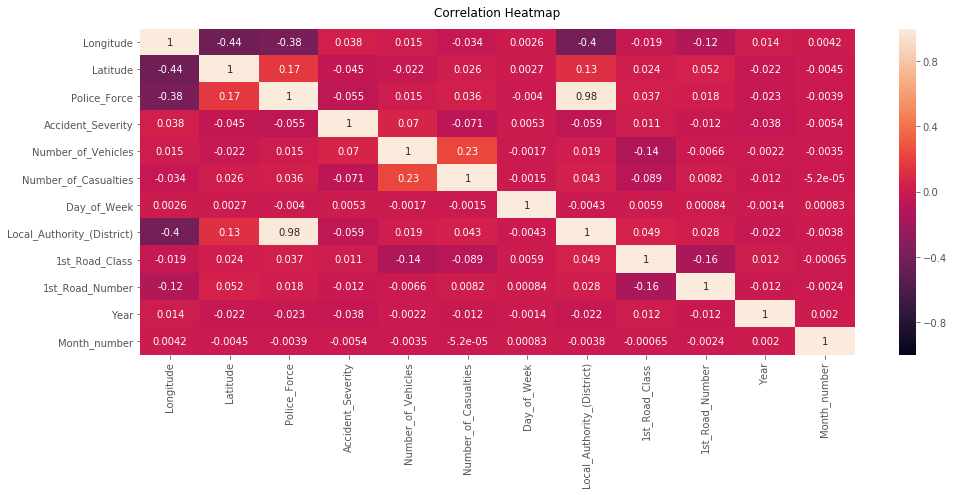

In [455]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(acc_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [456]:
map_dict = pd.read_csv('map/acc_severity.csv', header=None, index_col=0, squeeze=True).to_dict()
print(map_dict)
acc_df.Accident_Severity = acc_df.Accident_Severity.astype(str).map(map_dict)
acc_df.Accident_Severity.value_counts()


{'code': 'label', '1': 'Fatal', '2': 'Serious', '3': 'Slight'}


Slight     409035
Serious     90805
Fatal        6697
Name: Accident_Severity, dtype: int64

### 1. Which time in a week does the accident usually happen? Is there any pattern?

In this quesiton, I will post the data into the heatmap, to see in which time accidents happens the most frequent.


Text(60,0.5,'24 hours')

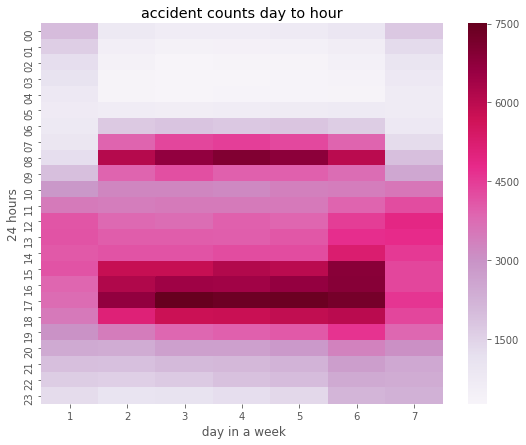

In [457]:
# acc_df.Day_of_Week.groupby([acc_df.Day_of_Week, acc_df.Hour]).count()
df1 = acc_df.groupby(['Hour','Day_of_Week']).size().unstack()
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df1,cmap="PuRd")
title = "accident counts day to hour"
xlabel = " day in a week"
ylabel = "24 hours"
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

#### patterns for the heatmap
In the heat map, we can see the accidents happens lots in the morning when people go to work, school and the time after working, school. 
<br>
It's instinctive due to the traffic volume is larger at that time. 


## 2. Is the pattern changes with fatal and nonfatal accidents?
 After get the pattern in the previous graph, I wonder if the pattern is the same in the fatal and non fatal condition?


In [458]:
df_list_isfatal = [acc_df[acc_df['Accident_Severity'] == 'Fatal'],acc_df[acc_df['Accident_Severity'] != 'Fatal']]

Text(0.5,1,'Nonfatal accident counts day to hour')

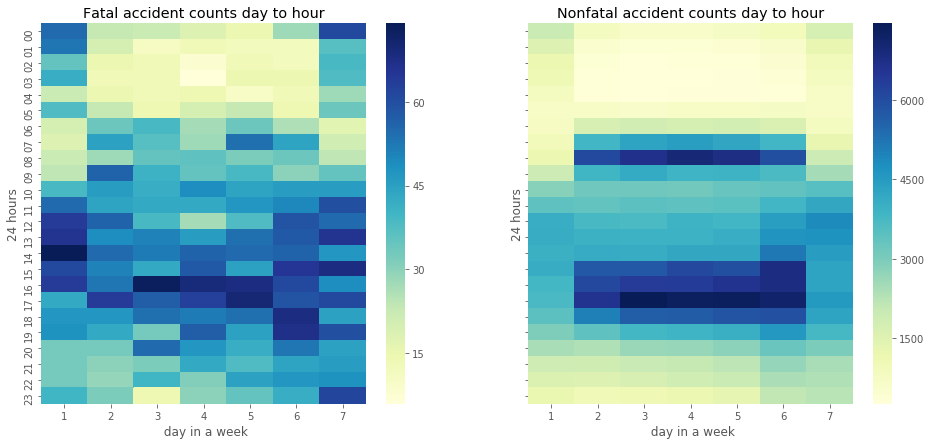

In [459]:
# compare fatal and non-fatal heatmap
df_list_isfatal = [acc_df[acc_df['Accident_Severity'] == 'Fatal'],acc_df[acc_df['Accident_Severity'] != 'Fatal']]
# plt.subplot(121)

df1 = df_list_isfatal[0].groupby(['Hour','Day_of_Week']).size().unstack()
df2 = df_list_isfatal[1].groupby(['Hour','Day_of_Week']).size().unstack()
f,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,7))
g1 = sns.heatmap(df1,cmap="YlGnBu",cbar=True,ax=ax1)
title = "Fatal accident counts day to hour"
xlabel = " day in a week"
ylabel = "24 hours"
g1.set_ylabel(ylabel)
g1.set_xlabel(xlabel)
g1.set_title(title)
# plt.subplot(1, 2, 2)
# plt.subplot(122)
# ax[1] = sns.heatmap(df2,cmap="PuRd")
g2 = sns.heatmap(df2,cmap="YlGnBu",cbar=True,ax=ax2)
title = "Nonfatal accident counts day to hour"
xlabel = " day in a week"
ylabel = "24 hours"
g2.set_ylabel(ylabel)
g2.set_xlabel(xlabel)
g2.set_title(title)

# for ax in [g1,g2]:
#     tl = ax.get_xticklabels()
#     ax.set_xticklabels(tl, rotation=0)
#     tly = ax.get_yticklabels()
#     ax.set_yticklabels(tly, rotation=90)

#### heatmap pattern
We can see that though the nonfatal accidents are simiar to the total accidents' heatmap. The fatal conditions distributes a different result. It scatter in the middle of the daytime but has an higher amount in the minight of the weekend.


## 3. In the past four years, is there any increasing or decreasing in the number of accidents?



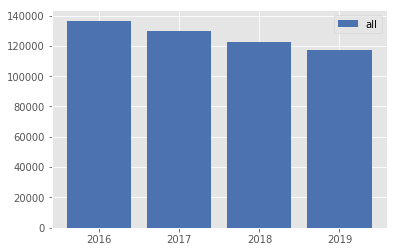

In [460]:
df1 = acc_df.Year.value_counts().to_dict()
# plt.bar([str(a) for a in list(df1.keys())], list(df1.values()))
plt.bar([str(a) for a in list(df1.keys())], list(df1.values()))
# df1.plot(kind = 'bar')
# df2 = df_list_isfatal[0].Year.value_counts()
# df2.plot(kind = 'bar',)
plt.legend(['all','nonfatal','fatal'], loc='upper right')
plt.style.use('seaborn-deep')

#### Accidents pattern for years
though we use only four years of traffic accident data, we can see an obvious decreasing trend in every year, it's a good sign and the effort to reduce accidents happening is working!


## 4. How about the trend in the month scale? Is there any different if we seperate the fatal and nonfatal?

Now we can zoom in to the month scale to see the trend of accidents happening. In addition, we want to know if the fatal and nonfatal accidents distribute to the same result. 

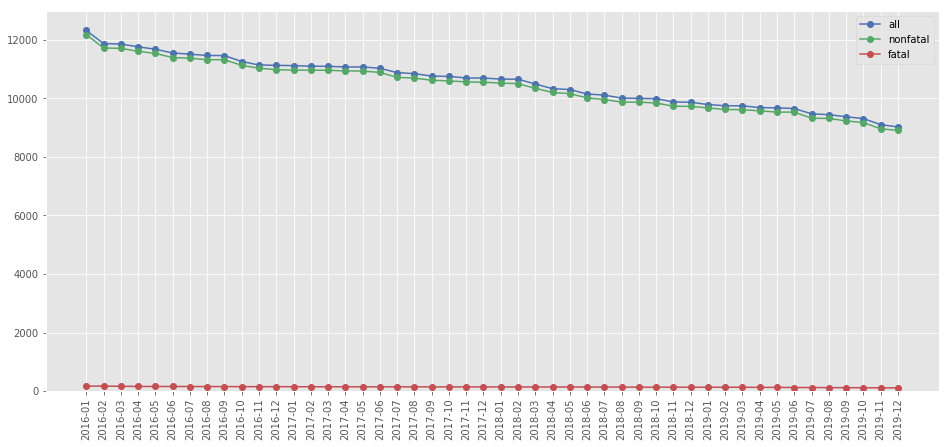

In [461]:
acc_df['year_month'] = acc_df['Date'].dt.strftime('%Y-%m')
df_list_isfatal = [acc_df[acc_df['Accident_Severity'] == 'Fatal'],acc_df[acc_df['Accident_Severity'] != 'Fatal']]
df1 = acc_df.year_month.value_counts().to_dict()
plt.subplots(figsize=(16, 7))
plt.plot([str(a) for a in sorted(list(df1.keys()))], list(df1.values()),'-o')

df2 = df_list_isfatal[0].year_month.value_counts().to_dict()
df3 = df_list_isfatal[1].year_month.value_counts().to_dict()

plt.xticks(rotation='vertical')
plt.ylim((0, 13000)) 
plt.plot([str(a) for a in sorted(list(df3.keys()))], list(df3.values()),'-o')
plt.plot([str(a) for a in sorted(list(df2.keys()))], list(df2.values()),'-o')
plt.legend(['all','nonfatal','fatal'], loc='upper right')
plt.style.use('seaborn-bright')

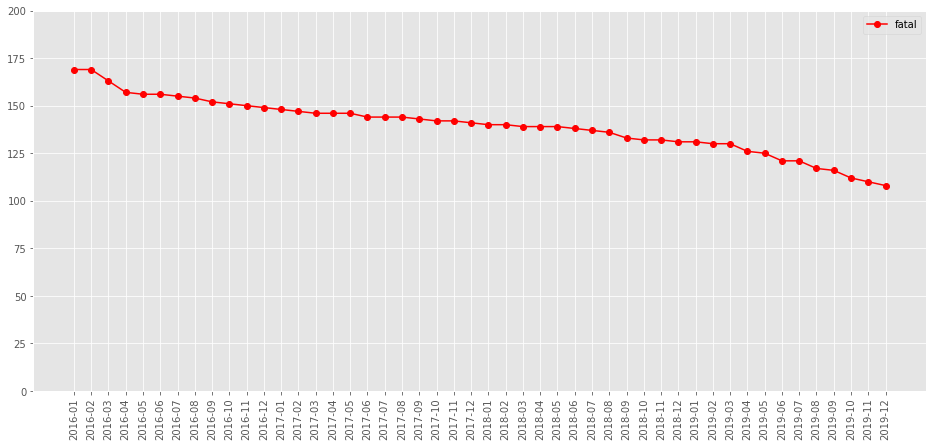

In [462]:
plt.subplots(figsize=(16, 7))
plt.plot([str(a) for a in sorted(list(df2.keys()))], list(df2.values()),'-o',color='red')
plt.xticks(rotation='vertical')
plt.ylim((0, 200)) 
plt.legend(['fatal'], loc='upper right')
plt.style.use('seaborn-deep')

#### Accidents pattern for months
We can see a obvious decreasing every 6-8 months, this is an interesting sight. Comparing to the fatal and nonfatal condition, it's glad to see the decreasing trend is the same in both side.


## 5. Where does the fatal accidents happens more? 
Which address fatal accidents happen accurately in? I built an heatmap map to the real address by using the folium library

In [463]:
# longitude, latitude heatmap with fatal condition
m = folium.Map([acc_df.Latitude[0],acc_df.Longitude[0]], zoom_start=13)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in df_list_isfatal[0][['Latitude','Longitude']].iterrows()]
# stationArr = acc_df[['Latitude', 'Longitude']].as_matrix()
HeatMap(heat_data).add_to(m)
# m.add_children(plugins.HeatMap(stationArr, radius=15))
m

#### Accidents heatmap in map
Heatmap mapping to real map is convenient and can see which area fatal accidents happens more, and we can notice the area or the junction to avoid the high possibility of encounter accidents.

## 6. Which districts has the higher fatal ratio per accidents?
Due to the traffic volume is not the same in every district, to make it fair, we want to see which district has the highest fatal ratio per accidents.

In [464]:
map_dict = pd.read_csv('map/Local_Authority_(District).csv', header=None, index_col=0, squeeze=True).to_dict()
# print(map_dict)
df_list_isfatal[0]['Local_Authority_(District)'] = df_list_isfatal[0]['Local_Authority_(District)'].astype(str).map(map_dict)
df_list_isfatal[1]['Local_Authority_(District)'] = df_list_isfatal[1]['Local_Authority_(District)'].astype(str).map(map_dict)
acc_df['Local_Authority_(District)'] = acc_df['Local_Authority_(District)'].astype(str).map(map_dict)
df_list_isfatal[0]['Local_Authority_(District)'].value_counts()
# df_list_isfatal[0]['Local_Authority_(District)']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Wiltshire              86
Cornwall               84
Birmingham             78
Highland               72
Cheshire East          71
                       ..
Hastings                1
Barrow-in-Furness       1
East Renfrewshire       1
Worthing                1
East Dunbartonshire     1
Name: Local_Authority_(District), Length: 379, dtype: int64

In [465]:
local_fatal_dict = df_list_isfatal[0]['Local_Authority_(District)'].value_counts().to_dict()
local_nonfatal_dict = df_list_isfatal[1]['Local_Authority_(District)'].value_counts().to_dict()
percent_dict = {}
for key in local_fatal_dict:
    temp = 100*local_fatal_dict[key]/(local_fatal_dict[key]+local_nonfatal_dict[key])
    if temp > 3:
        percent_dict[key] = round(temp,2)
percent_dict


{'Highland': 5.11,
 'Daventry': 7.97,
 'South Lanarkshire': 3.05,
 'Stratford-upon-Avon': 3.83,
 'West Lindsey': 3.77,
 'Perth and Kinross': 5.96,
 'Aberdeenshire': 3.95,
 'North Kesteven': 3.68,
 'Scottish Borders': 5.1,
 'Dumfries and Galloway': 3.75,
 'South Northamptonshire': 5.1,
 'Cotswold': 4.77,
 'Argyll and Bute': 4.45,
 'East Cambridgeshire': 4.31,
 'Boston': 3.86,
 'Eden': 4.27,
 'Vale of White Horse': 3.0,
 'Mendip': 3.21,
 'Gwynedd': 3.48,
 'Derbyshire Dales': 4.31,
 'Harborough': 5.39,
 'North West Leicestershire': 3.76,
 'Hambleton': 3.02,
 'Conwy': 3.04,
 'Craven': 3.87,
 'Moray': 8.47,
 'Angus': 4.28,
 'Tewkesbury': 3.29,
 'Melton': 5.83,
 'Forest Heath': 3.54,
 'Ryedale': 3.05,
 'Bolsover': 3.73,
 'Forest of Dean': 4.24,
 'Monmouthshire': 3.76,
 'Ribble Valley': 3.09,
 'Blaenau Gwent': 3.68,
 'Orkney Islands': 8.11,
 'Clackmannanshire': 3.19,
 'Shetland Islands': 5.19,
 'Western Isles': 3.45}

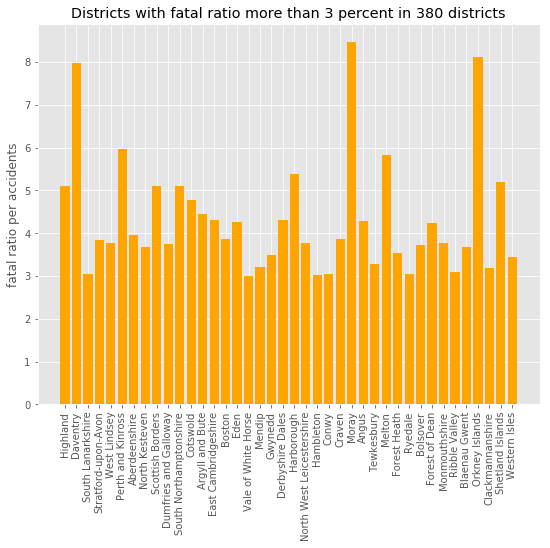

In [466]:
plt.subplots(figsize=(9, 7))
plt.bar(percent_dict.keys(), percent_dict.values(),color = 'orange')
plt.ylabel('fatal ratio per accidents')
plt.xticks(rotation='vertical')
plt.title('Districts with fatal ratio more than 3 percent in '+str(len(local_nonfatal_dict))+' districts')
plt.style.use('seaborn-deep')

#### Fatal ratio pattern in districts
After listing the most highest ratio in fatal accidents, we can easily see which districts is more dangerous. Though the accidents seldom happens, it may be a serious result when the accidents happening.  

## 7.Which area happens more , urban or rural?
## 8. How about the fatal and nonfatal condition?

Now I want to compare the urban and rural area. The urban area usually has a higher traffic volume, will it also has more accidents happened?

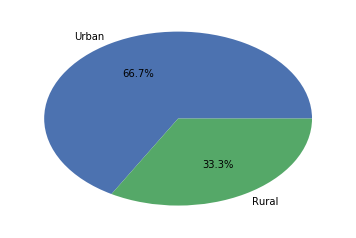

In [467]:
map_dict = {'1':'Urban','2':'Rural'}
# print(map_dict)
df1 = acc_df['Urban_or_Rural_Area'].astype(str).map(map_dict)

urban_rural_dict = df1.value_counts().to_dict()
urban_rural_dict
plt.pie(urban_rural_dict.values(),labels = urban_rural_dict.keys(),autopct='%1.1f%%')
plt.style.use('seaborn-deep')
plt.show()

{'1': 'Urban', '2': 'Rural'}


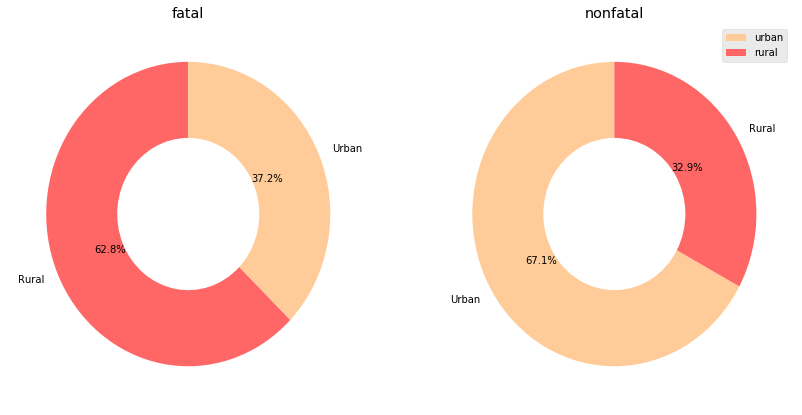

In [468]:
map_dict = {'1':'Urban','2':'Rural'}
print(map_dict)
df1 = df_list_isfatal[0]['Urban_or_Rural_Area'].astype(str).map(map_dict)
df2 = df_list_isfatal[1]['Urban_or_Rural_Area'].astype(str).map(map_dict)

urban_rural_dict_1 = df1.value_counts().to_dict()
urban_rural_dict_2 = df2.value_counts().to_dict()
f,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (14,7))
colors_fatal = ['#ff6666', '#ffcc99']
color_non_fatal = ['#99ff99', '#66b3ff']
ax1.pie(urban_rural_dict_1.values(),labels = urban_rural_dict_1.keys(),autopct='%1.1f%%',wedgeprops={'width': 0.5},colors=colors_fatal,startangle=90)
ax1.set_title('fatal')

ax2.pie(urban_rural_dict_2.values(),labels = urban_rural_dict_2.keys(),autopct='%1.1f%%',wedgeprops={'width': 0.5},colors=colors_fatal[::-1],startangle=90)
ax2.set_title('nonfatal')
ax2.legend(['urban','rural'], loc='upper right')
plt.style.use('seaborn-deep')

#### Rural and Urban area comparion
I use pie chart and donutes chart to show the ratio of urban and rural. It's interesting that the fatal and nonfatal area has the opposite contribution in the two area. The fatal accidents do happens more in the rural area.

## 9. How about the condition of fatal accidents in rural area?
After the above question, Let's go deeper to see the rural area.

In [469]:
df_list_isfatal[0]['Urban_or_Rural_Area'] = df_list_isfatal[0]['Urban_or_Rural_Area'].astype(str).map(map_dict)

df_list_isfatal[0]
# df2_fatal = df1_fatal[df1_fatal['Urban_or_Rural_Area'] == 'Rural']
# df2_fatal.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Month_number,Month,Hour,year_month
11,2019010155210,-0.021065,51.533238,1,Fatal,1,1,2019-01-01,3,03:00,...,1,0,0,Urban,1,2019,1,January,03,2019-01
226,2019010156081,-0.147713,51.451270,1,Fatal,1,1,2019-07-01,2,09:04,...,1,0,0,Urban,1,2019,7,July,09,2019-07
510,2019010157046,-0.123996,51.448411,1,Fatal,1,1,2019-12-01,7,00:20,...,1,0,0,Urban,1,2019,12,December,00,2019-12
599,2019010157331,-0.063660,51.406701,1,Fatal,1,2,2019-01-13,1,20:08,...,1,0,6,Urban,1,2019,1,January,20,2019-01
1146,2019010158971,-0.012533,51.590080,1,Fatal,1,1,2019-01-22,3,23:42,...,2,0,0,Urban,1,2019,1,January,23,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506644,2016983127116,-3.641488,54.894564,98,Fatal,2,1,2016-07-08,1,14:50,...,1,0,0,Rural,1,2016,7,July,14,2016-07
506654,2016983132216,-3.779675,55.385104,98,Fatal,1,1,2016-08-15,2,19:20,...,1,0,0,Rural,1,2016,8,August,19,2016-08
506699,2016984105716,-3.517858,55.189968,98,Fatal,2,1,2016-04-02,5,19:30,...,2,0,0,Rural,1,2016,4,April,19,2016-04
506705,2016984107116,-3.444528,55.297929,98,Fatal,2,2,2016-02-22,2,12:13,...,1,0,0,Rural,1,2016,2,February,12,2016-02


In [470]:
df_ = df_list_isfatal[0][df_list_isfatal[0]['Urban_or_Rural_Area'] == 'Rural']

In [471]:
map_dict = pd.read_csv('map/Weather.csv', header=None, index_col=0, squeeze=True).to_dict()
df_['Weather_Conditions'] = df_['Weather_Conditions'].astype(str).map(map_dict)
dict_ = df_['Weather_Conditions'].value_counts().to_dict()
dict_
# plt.pie(dict_.values(),labels = dict_.keys(),autopct='%1.1f%%',wedgeprops={'width': 0.5},startangle=90)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{'Fine no high winds': 3435,
 'Raining no high winds': 412,
 'Raining + high winds': 74,
 'Unknown': 73,
 'Fine + high winds': 67,
 'Other': 62,
 'Fog or mist': 56,
 'Snowing no high winds': 20,
 'Snowing + high winds': 2}

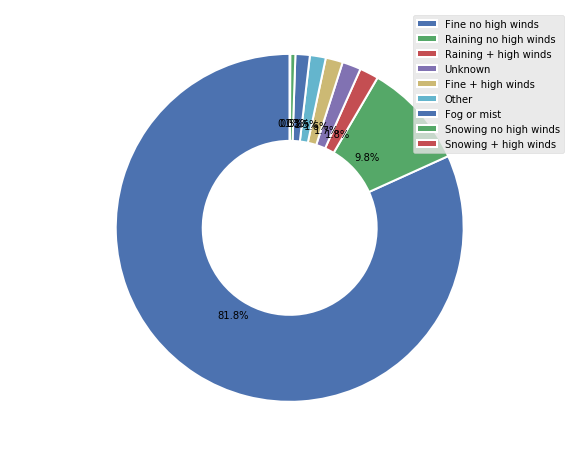

In [472]:
plt.figure(figsize=(10,8))
plt.gca().axis("equal")
plt.pie(dict_.values(),labels = ['']*len(dict_.keys()),autopct='%1.1f%%',startangle=90,
                            wedgeprops = { 'linewidth': 2, "edgecolor" :"white" ,'width': 0.5})
plt.legend(loc='upper right',bbox_to_anchor=(1,1),labels=dict_.keys())
plt.style.use('seaborn-deep')
plt.show()

#### Weather ratio in the rural area of fatal accidents
Though we want to see how much the weather affect the result, we can only infer that the accidents happens a lot in the nice weather and most day in year is nice weather.  

## 10. In the fatal accidents, is there any difference about the combination of the urban and rural areas? 
Let's go another directions about the light conditions. Is dark increasing the possibility of fatal accidents?

In [473]:
map_dict = pd.read_csv('map/Weather.csv', header=None, index_col=0, squeeze=True).to_dict()
df_list_isfatal[0]['Light_Conditions'] = df_list_isfatal[0]['Light_Conditions'].astype(str).map(map_dict)
dict_rural = df_list_isfatal[0][df_list_isfatal[0]['Urban_or_Rural_Area'] == 'Rural']['Light_Conditions'].value_counts().to_dict()
dict_urban = df_list_isfatal[0][df_list_isfatal[0]['Urban_or_Rural_Area'] == 'Urban']['Light_Conditions'].value_counts().to_dict()
# del dict_rural['NaN']
# del dict_urban['NaN']
dict_rural

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{'Fine no high winds': 2573,
 'Snowing + high winds': 1148,
 'Fine + high winds': 368,
 'Fog or mist': 69,
 'Raining + high winds': 44}

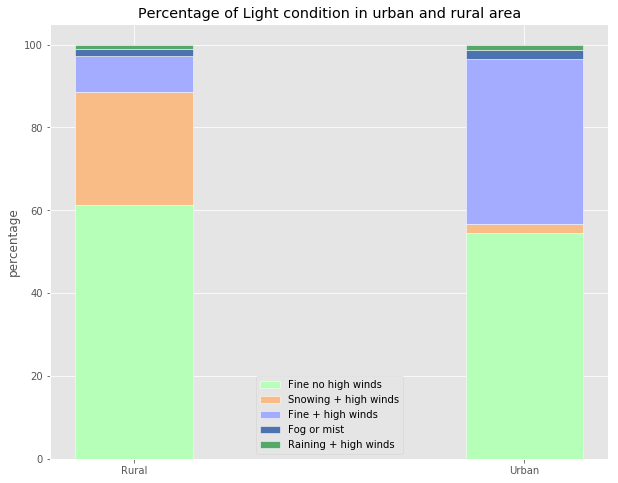

In [474]:
keys = dict_rural.keys()
sum_ = [0,0]
sum_[0] = sum(dict_rural.values())
sum_[1] = sum(dict_urban.values())

plot_dict = {}
for a in keys:
    x = [100*dict_rural[a]/sum_[0],100*dict_urban[a]/sum_[1]]
    plot_dict[a] = x
barWidth = 0.3
r = [0,1]
names = ['Rural','Urban']
plt.figure(figsize=(10,8))
plt.bar(r, plot_dict['Fine no high winds'], color='#b5ffb9', edgecolor='white', width=barWidth,label='Fine no high winds')
plt.bar(r, plot_dict['Snowing + high winds'], bottom=plot_dict['Fine no high winds'], color='#f9bc86', edgecolor='white', width=barWidth,label='Snowing + high winds')
bot = [i+j for i,j in zip(plot_dict['Fine no high winds'],plot_dict['Snowing + high winds'])]
plt.bar(r, plot_dict['Fine + high winds'], bottom=bot, color='#a3acff', edgecolor='white', width=barWidth,label='Fine + high winds')
bot = [i+j for i,j in zip(plot_dict['Fine + high winds'],bot)]
plt.bar(r, plot_dict['Fog or mist'], bottom=bot, edgecolor='white', width=barWidth,label='Fog or mist')
bot = [i+j for i,j in zip(plot_dict['Fog or mist'],bot)]
plt.bar(r, plot_dict['Raining + high winds'], bottom=bot, edgecolor='white', width=barWidth,label='Raining + high winds')
plt.xticks(r, names)
plt.title('Percentage of Light condition in urban and rural area')
plt.ylabel('percentage')
plt.legend()
plt.show()






#### Light conditions distribution in the fatal accidents between Rural and Urban area
In this graph, we can see that the light and dark condition is similar in both area. However, 'Snowing+high winds' and 'Fine+high winds' is very different in the Urban and Rural area. Snowing has more ratio in Rural area. 

 
## 11. The age distribution of the fatal casualtie's age


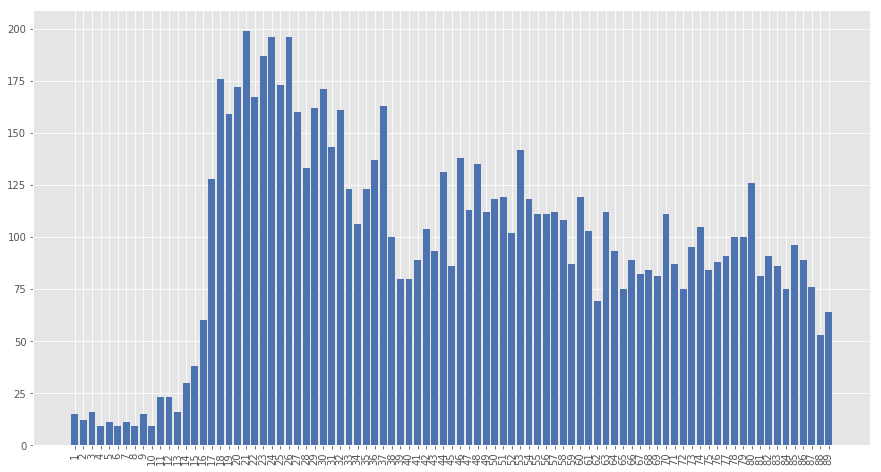

In [475]:
cas_age_fatal = cas_df[cas_df.Casualty_Severity == 1].Age_of_Casualty.value_counts().to_dict()
cas_age_nonfatal = cas_df[cas_df.Casualty_Severity != 1].Age_of_Casualty.value_counts().to_dict()
r = [str(a) for a in range(1,90)]
plt.figure(figsize=(15,8))


# value_non = [cas_age_nonfatal.get(a,0) for a in range(1,90)]
# plt.bar(r,value_non)

value = [cas_age_fatal.get(a,0) for a in range(1,90)]
plt.bar(r,value)
plt.xticks(rotation='vertical')
plt.show()

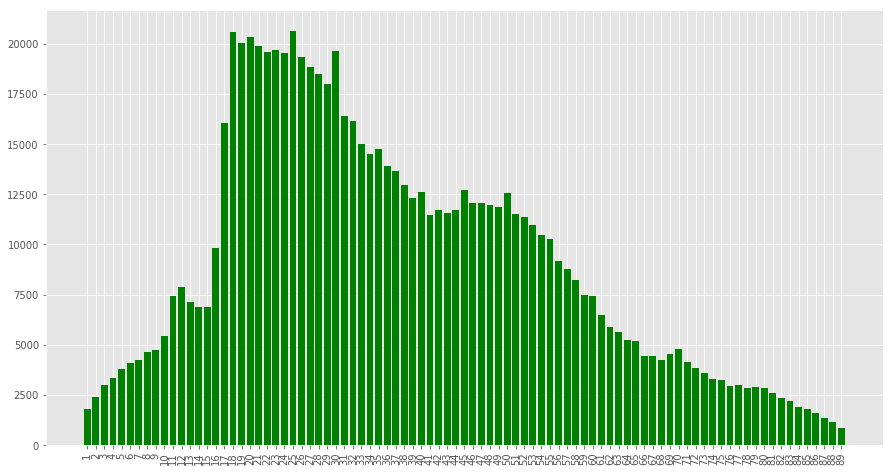

In [476]:
plt.figure(figsize=(15,8))
value_non = [cas_age_nonfatal.get(a,0) for a in range(1,90)]
plt.bar(r,value_non,color='g')
plt.xticks(rotation='vertical')
plt.show()

#### Age distribution in the casualties
In the both of fatal and nonfatal accidents, accidents happens more in the age 16-30 people. In the nonfatal accidents, the number of cases decrease with the increasing ages. 

###### Final Thoughts

We can summarize our findings as follows:
1. Accidents happens more in rush hours, but fatal accidents is not in this rule. 
2. The accidents number decreases in every year.
3. Rural area has a higher possibility in fatal accidents and snow,high wind weather.
4. The area has much ratio of possibility should be concerned more.
5. Accidents happens more in the age between 16 to 30, and nonfatal accidents is not common for the old people. 

## Reference
1. https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data
2. https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/
3. https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
4. https://medium.com/@rawanme/u-k-traffic-accidents-data-analysis-10-years-c81293180ee5
5. https://github.com/GenTaylor/Traffic-Accident-Analysis
6. https://python-graph-gallery.com/13-percent-stacked-barplot/